# Lending Club: Assessing Loan Default Risk

#### Context: 
Lending Club is a  P2P consumer lending business that offer alternative investment opportunities to the average investor. Investors can invest in debt instruments for either 36 or 60 months periods and generate historical average returns between 4-7%. Lending Club has 12 years of accepted loan data from 2007 - 2018. We would like to assess the risks of these loans and classify good vs. bad loans. We classify good loans as loans that end up being fully paid and bad loans as loans that end in default or are charged off. As risk-averse debt investors we would like primarily avoid loans that will default.

#### Objective: 
- Predict and assess the level of risk or default of loans and loan applicants.
- Use machine learning to classify whether loan will be fully paid off. 

#### Measure of success:
We will measure success by whether our model is able to classify whether a future loan will result in default or not.

###### Good Loan: 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'
###### Bad Loan: 'Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default']

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import _pickle as cPickle
%matplotlib inline
pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',999)


In [3]:
accept = pd.read_csv('accepted_2007_to_2018Q4.csv.gz')
accept.to_pickle('dfaccept')
df = pd.read_pickle('dfaccept')

C:\Users\mjdch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Classify dependent variable

We are only interested in loans that result in a binary result of either "Fully Paid" or "Default/Charged Off". Current Loans or Late Loans have yet to be classified and can result in default, charged off or fully paid. We will remove these observations.

In [4]:
accept.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [67]:
accept.year.dt.year

0          2015.0
1          2015.0
2          2015.0
3          2015.0
4          2015.0
5          2015.0
6          2015.0
7          2015.0
8          2015.0
9          2015.0
10         2015.0
11         2015.0
12         2015.0
13         2015.0
14         2015.0
15         2015.0
16         2015.0
17         2015.0
18         2015.0
19         2015.0
20         2015.0
21         2015.0
22         2015.0
23         2015.0
24         2015.0
25         2015.0
26         2015.0
27         2015.0
28         2015.0
29         2015.0
30         2015.0
31         2015.0
32         2015.0
33         2015.0
34         2015.0
35         2015.0
36         2015.0
37         2015.0
38         2015.0
39         2015.0
40         2015.0
41         2015.0
42         2015.0
43         2015.0
44         2015.0
45         2015.0
46         2015.0
47         2015.0
48         2015.0
49         2015.0
50         2015.0
51         2015.0
52         2015.0
53         2015.0
54         2015.0
55        

In [68]:
accept['year'] =accept.year.dt.year

Text(0.5, 1.0, 'Number of Loans per Year')

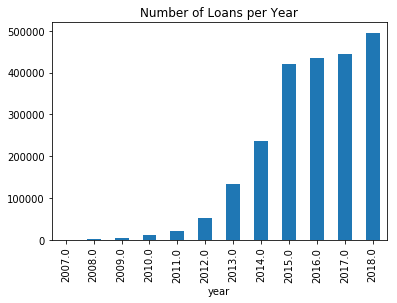

In [72]:
accept.groupby('year')['loan_amnt'].count().plot.bar()
plt.title('Number of Loans per Year')

In [352]:
accept.int_rate.describe()

count    2.260668e+06
mean     1.309283e+01
std      4.832138e+00
min      5.310000e+00
25%      9.490000e+00
50%      1.262000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

In [5]:
df_negClass = df[df['loan_status'].isin(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'])]

df_posClass = df[df['loan_status'].isin(['Charged Off', 
                                         'Does not meet the credit policy. Status:Charged Off', 'Default'])]


df = pd.concat([df_negClass, df_posClass])


In [6]:
df['loan_status_binary'] = (~df.loan_status.isin(['Fully Paid',\
                                                  'Does not meet the credit policy. Status:Fully Paid'])).astype(int)

In [7]:
df.loan_status_binary.value_counts()

0    1078739
1     269360
Name: loan_status_binary, dtype: int64

In [8]:
#80% of the observations are non-default. 20% default. 
df.loan_status_binary.value_counts()/df.loan_status_binary.count()

0    0.800193
1    0.199807
Name: loan_status_binary, dtype: float64

In [9]:
df.drop('loan_status', axis = 1, inplace = True)

#### Check missing Values

In [10]:
def missing_data(df):
    miss = np.sum(df.isnull(),axis =0)
    miss = miss.loc[miss>0].sort_values(ascending = False)
    missmean = np.mean(df.isnull(),axis =0)
    missmean = missmean.loc[missmean>0].sort_values(ascending = False)
    return pd.concat([miss.rename('count'),missmean.rename('mean')],axis = 1)

In [11]:
missing_data(df)

,count,mean
member_id,1348099,1.000000e+00
next_pymnt_d,1345310,9.979312e-01
orig_projected_additional_accrued_interest,1344338,9.972101e-01
hardship_length,1342343,9.957303e-01
hardship_type,1342343,9.957303e-01
hardship_reason,1342343,9.957303e-01
hardship_status,1342343,9.957303e-01
hardship_amount,1342343,9.957303e-01
hardship_start_date,1342343,9.957303e-01
hardship_end_date,1342343,9.957303e-01


#### Drop/Remove Unnecessary Columns

Drop columns related to 'hardship','settlement', and other columns we would not know at the time of loan applications

In [12]:
hardship_columns = df.columns[df.columns.str.contains('hardship',case = False)]
settlement_columns = df.columns[df.columns.str.contains('settlement',case = False)]

df.drop(hardship_columns, axis =1, inplace = True)
df.drop(settlement_columns, axis =1, inplace = True)

#drop additional columns related to hardship
df.drop(['deferral_term','payment_plan_start_date',\
         'orig_projected_additional_accrued_interest'], axis =1, inplace = True)

Drop columns that will be unnecessary for model, mostly columns with diverse string values.
It would be interesting to apply NLP techniques to group descriptions and perform semantic analysis. 

In [13]:
df.drop(['id','member_id','url','emp_title','zip_code','title','desc'],axis =1, inplace = True)

Drop features with only one value

In [14]:
# for col in df.columns:
#     if df[col].nunique() == 1:
#         print(df[col].value_counts())
df.drop(['policy_code','pymnt_plan'], axis = 1, inplace = True)

### Prepayment and Profit Analysis 

In [78]:
df.loan_status_binary.value_counts()/df.loan_status_binary.value_counts().sum()

0    0.800193
1    0.199807
Name: loan_status_binary, dtype: float64

In [15]:
df.issue_d = pd.to_datetime(df.issue_d)
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d)

In [16]:
df.term.value_counts()

 36 months    1023206
 60 months     324893
Name: term, dtype: int64

In [17]:
df['term_num'] = np.where(df.term == ' 36 months',36,60)

In [18]:
def month_diff(a, b):
    return abs(12 * (a.dt.year - b.dt.year) + (a.dt.month - b.dt.month))-1

In [19]:
df['month_delta'] = month_diff(df.last_pymnt_d,df.issue_d)

In [20]:
df['year'] = df.issue_d.dt.year

In [21]:
df['months_prepaid'] = df.term_num - df.month_delta

In [22]:
df.groupby(['loan_status_binary','term_num']).agg({'months_prepaid':'mean'})

months_prepaid
loan_status_binary term_num                
0                  36             15.091145
                   60             38.071421
1                  36             22.087528
                   60             43.170055

Analyze without 2016-2018 because these years contain many prepaid loans

In [23]:
three = max(df.issue_d) - pd.Timedelta(36,'M')
five =  max(df.issue_d) - pd.Timedelta(60,'M')

In [24]:
three_df = df.loc[(df.term == ' 36 months') & (df.issue_d <three)]

In [25]:
five_df = df.loc[(df.term == ' 60 months') & (df.issue_d <five)]

In [26]:
prepay_df_full = pd.concat([three_df,five_df])

In [27]:
prepay_df = prepay_df_full[['month_delta','term_num','loan_status_binary','year']]

In [28]:
prepay_df['months_prepaid'] = (prepay_df.term_num - prepay_df.month_delta)

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
prepay_df.groupby(['loan_status_binary','term_num']).agg({'months_prepaid':'mean'})

months_prepaid
loan_status_binary term_num                
0                  36             11.194526
                   60             24.008827
1                  36             19.876026
                   60             37.326700

Calculate % that prepay every year

In [30]:
#fully paid prepayment df and default df
fp_pre_df = prepay_df.loc[prepay_df.loan_status_binary == 0]
d_pre_df = prepay_df.loc[prepay_df.loan_status_binary == 1]

In [31]:
fp_pre_df['Prepayment'] =  np.where(fp_pre_df.month_delta < fp_pre_df.term_num,
                                    'Prepayment','Non-Prepayment')

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
fp_group= fp_pre_df[['loan_status_binary','year','Prepayment']].groupby(['Prepayment','year']).count().reset_index()

In [33]:
fp_group_dict = fp_group.groupby('year').agg({'loan_status_binary':'sum'}).to_dict()
fp_group_dict = fp_group_dict['loan_status_binary']

In [34]:
fp_group['year_count'] = fp_group.apply(lambda t: fp_group_dict[t.year], axis =1)
fp_group['percentage'] = fp_group.loan_status_binary/fp_group.year_count

In [35]:
fp_group

,Prepayment,year,loan_status_binary,year_count,percentage
0,Non-Prepayment,2007,71,445,0.159551
1,Non-Prepayment,2008,371,1897,0.195572
2,Non-Prepayment,2009,859,4558,0.188460
3,Non-Prepayment,2010,2340,10780,0.217069
4,Non-Prepayment,2011,3515,18424,0.190784
5,Non-Prepayment,2012,3759,44723,0.084051
6,Non-Prepayment,2013,6848,110849,0.061778
7,Non-Prepayment,2014,11404,140255,0.081309
8,Non-Prepayment,2015,22378,240894,0.092896
9,Prepayment,2007,374,445,0.840449


In [36]:
a = fp_group.loc[fp_group.Prepayment == 'Prepayment',['year','loan_status_binary']].rename(columns = {'loan_status_binary':'Prepayment'})
b = pd.DataFrame(fp_group.loc[fp_group.Prepayment != 'Prepayment','loan_status_binary']).rename(columns = {'loan_status_binary':'Non-Prepayment'})

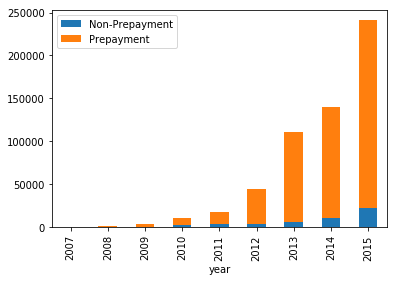

In [37]:
pd.concat([b,a.reset_index(drop = True)],axis = 1).set_index('year').plot.bar(stacked = True)

In [38]:
fp_group.groupby('Prepayment').agg({'percentage':'mean'})

,percentage
Prepayment,
Non-Prepayment,0.141274
Prepayment,0.858726


Calculate % prepaid on the whole dataset

In [39]:
prepayment_df = df[['month_delta','term_num','loan_status_binary','year']]

In [40]:
prepayment_df.shape

(1348099, 4)

In [41]:
#fully paid prepayment df
fp_pre_df = prepayment_df.loc[prepayment_df.loan_status_binary == 0]
d_pre_df = prepayment_df.loc[prepayment_df.loan_status_binary == 1]

In [42]:
fp_pre_df['Prepayment'] =  np.where(fp_pre_df.month_delta < fp_pre_df.term_num,
                                    'Prepayment','Non-Prepayment')

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
fp_group= fp_pre_df[['loan_status_binary','year','Prepayment']].groupby(['Prepayment','year']).count().reset_index()

In [44]:
fp_group_dict = fp_group.groupby('year').agg({'loan_status_binary':'sum'}).to_dict()
fp_group_dict = fp_group_dict['loan_status_binary']

In [45]:
fp_group['year_count'] = fp_group.apply(lambda t: fp_group_dict[t.year], axis =1)
fp_group['percentage'] = fp_group.loan_status_binary/fp_group.year_count

In [46]:
a = fp_group.loc[fp_group.Prepayment == 'Prepayment',['year','loan_status_binary']].rename(columns = {'loan_status_binary':'Prepayment'})
b = pd.DataFrame(fp_group.loc[fp_group.Prepayment != 'Prepayment','loan_status_binary']).rename(columns = {'loan_status_binary':'Non-Prepayment'})

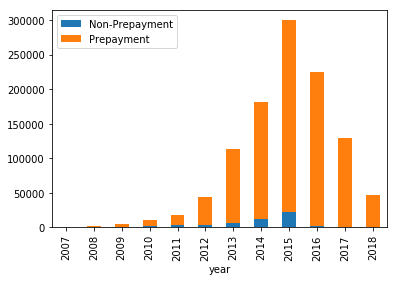

In [47]:
pd.concat([b,a.reset_index(drop = True)],axis = 1).set_index('year').plot.bar(stacked = True)

In [48]:
fp_group

,Prepayment,year,loan_status_binary,year_count,percentage
0,Non-Prepayment,2007,71,445,0.159551
1,Non-Prepayment,2008,371,1897,0.195572
2,Non-Prepayment,2009,859,4558,0.188460
3,Non-Prepayment,2010,2340,10780,0.217069
4,Non-Prepayment,2011,3515,18424,0.190784
5,Non-Prepayment,2012,3759,44723,0.084051
6,Non-Prepayment,2013,7055,113780,0.062006
7,Non-Prepayment,2014,11723,181941,0.064433
8,Non-Prepayment,2015,22378,299742,0.074658
9,Non-Prepayment,2016,2608,224853,0.011599


In [49]:
fp_group = fp_group.append({'Prepayment':'Non-Prepayment', 'year': 2017, 'loan_status_binary':0, 'year_count':0, 'percentage':0}, ignore_index = True).append({'Prepayment':'Non-Prepayment', 'year': 2018, 'loan_status_binary':0, 'year_count':0, 'percentage':0}, ignore_index = True)

In [50]:
fp_group.groupby('Prepayment').agg({'percentage':'mean'})

,percentage
Prepayment,
Non-Prepayment,0.104015
Prepayment,0.895985


In [51]:
df['profit'] = df.total_pymnt - df.loan_amnt

In [52]:
df.groupby(['loan_status_binary','term']).agg({'profit':['mean','std','median']})

profit                          
                                      mean          std       median
loan_status_binary term                                             
0                   36 months  1697.534524  1564.929653  1269.555000
                    60 months  4745.965995  3938.332283  3755.562043
1                   36 months -5663.002070  5738.791041 -4147.345000
                    60 months -9759.669507  7289.590639 -8985.550000

Calculate average profit for 2008-2015, since most loans in 2015-2018 are prepaid and will collect less profit than normal. 

In [53]:
prepay_df_full['profit'] = prepay_df_full.total_pymnt - prepay_df_full.loan_amnt

In [54]:
prepay_df_full.groupby(['loan_status_binary','term']).agg({'profit':['mean','std','median']})

profit                          
                                      mean          std       median
loan_status_binary term                                             
0                   36 months  1905.211146  1605.233533  1493.168994
                    60 months  6881.787171  5076.256849  6060.103022
1                   36 months -4426.693752  4897.732394 -3260.355000
                    60 months -6419.923517  8042.124995 -6081.220000

Grade/Sub-Grade Analysis

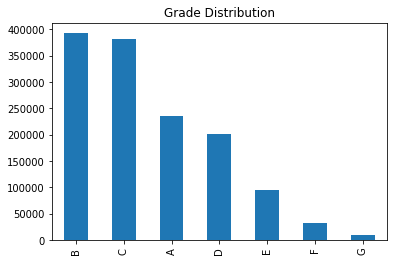

In [55]:
df.grade.value_counts().plot.bar(title = 'Grade Distribution')

Text(0, 0.5, 'Loan Status')

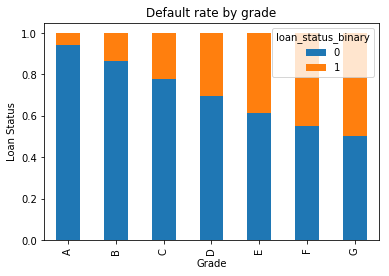

In [56]:
loan_stats = pd.crosstab(df.grade, df.loan_status_binary)
loan_stats = loan_stats.div(loan_stats.sum(1).astype(float),axis=0)
loan_stats.plot(kind='bar', stacked=True, title='Default rate by grade')
plt.xlabel('Grade')
plt.ylabel('Loan Status')

In [80]:
df.groupby(['grade','loan_status_binary'])['int_rate'].mean()

grade  loan_status_binary
A      0                      7.095715
       1                      7.389264
B      0                     10.662186
       1                     10.789273
C      0                     14.002720
       1                     14.076300
D      0                     17.680156
       1                     17.779976
E      0                     21.062726
       1                     21.176798
F      0                     24.732908
       1                     25.049212
G      0                     27.283200
       1                     27.805112
Name: int_rate, dtype: float64

Text(0.5, 1.0, 'Average Interest Rate by Grade')

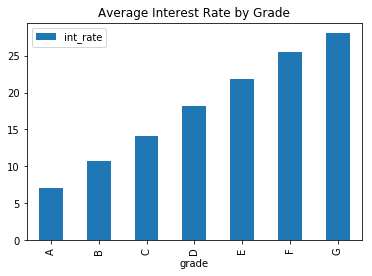

In [354]:
accept[['grade','int_rate']].groupby('grade').agg({'int_rate':'mean'}).plot.bar()
plt.title('Average Interest Rate by Grade')

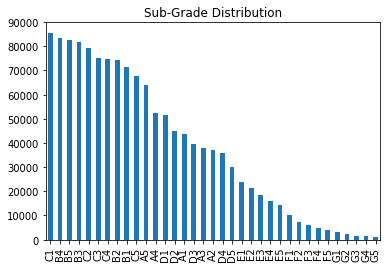

In [58]:
df.sub_grade.value_counts().plot.bar(title = 'Sub-Grade Distribution')

Text(0.5, 1.0, 'Interest Rate by Sub-Grade')

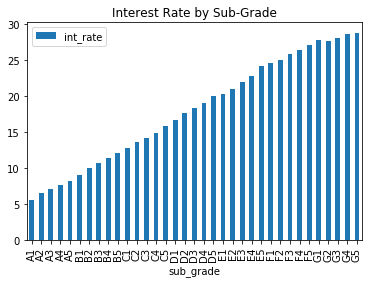

In [356]:
accept[['sub_grade','int_rate']].groupby('sub_grade').agg({'int_rate':'mean'}).plot.bar()
plt.title('Interest Rate by Sub-Grade')

In [60]:
total_payments_df = df[['total_pymnt','total_rec_prncp','total_rec_int','profit']]

In [64]:
df.groupby('year')['loan_amnt'].count()

year
2007       603
2008      2393
2009      5281
2010     12537
2011     21721
2012     53367
2013    134804
2014    223103
2015    375546
2016    293105
2017    169321
2018     56318
Name: loan_amnt, dtype: int64

In [81]:
#drop features that were not available at the time of the loan application
df.drop(['profit','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
        'last_credit_pull_d'], axis=1, inplace=True) 

The date the loan was issued does not give us any information about the borrower. drop 'issue_d'

In [82]:
df.drop(['issue_d'], axis=1, inplace=True)

We will drop columns with 90%+ missing values (columns are mainly related to hardship, settlement and secondary applicant)

There are 98%+ missing values for secondary applicant because Lending Club started offering joint loans in October 2015: https://www.lendacademy.com/joint-application-lending-club-loans/. Not enough data to move the needle.

We will also drop values with 50%+ missing values: it will be tough to accurately impute without more in-depth descriptions of the features, and imputing incorrectly will be more harmful than not. 

In [83]:
miss = missing_data(df)
misscolumns = miss.loc[miss['mean']>0.5].index
df.drop(misscolumns, axis =1, inplace = True)

#### Pickle semi-processed dataframe for memory efficiency

In [84]:
df.to_pickle('dfaccept_semiprocessed')
df = pd.read_pickle('dfaccept_semiprocessed')

In [85]:
missing_data(df)

,count,mean
mths_since_recent_inq,176822,0.131164
num_tl_120dpd_2m,120152,0.089127
mo_sin_old_il_acct,108325,0.080354
emp_length,78550,0.058267
pct_tl_nvr_dlq,70430,0.052244
avg_cur_bal,70298,0.052146
mo_sin_old_rev_tl_op,70277,0.052130
mo_sin_rcnt_rev_tl_op,70277,0.052130
num_rev_accts,70277,0.052130
num_il_tl,70276,0.052130


In [86]:
#emp_length is of type object, we will convert this to integer
map = {"n/a":0, "< 1 ":1, "1 ":1, "2 ":2, "3 ":3, "4 ":4, "5 ":5, "6 ":6, "7 ":7, "8 ":8, "9 ":9, "10+ ":10}
df.emp_length = df.emp_length.str.replace("years","")
df.emp_length = df.emp_length.str.replace("year","")
df.emp_length.replace(map, inplace=True)

In [87]:
df.emp_length.value_counts()

10.0    442679
1.0     197380
2.0     122100
3.0     107868
5.0      84326
4.0      80763
6.0      62879
8.0      60811
7.0      59724
9.0      51019
Name: emp_length, dtype: int64

In [88]:
#column 'earliest_cr_line' describes the date when first credit line was established. The longer the duration the more desirable
#the borrower. We will convert this measure to number of days since first credit line was established.
df['earliest_cr_line'] = df['earliest_cr_line'].apply(pd.to_datetime)
end = np.datetime64('2018-12', 'D')
df['earliest_cr_line'] = pd.Timestamp(end) - df['earliest_cr_line']
df['earliest_cr_line'] = df['earliest_cr_line'] / np.timedelta64(1, 'D')
df['earliest_cr_line'] = df.earliest_cr_line.replace("NaN", 0)

After trimming the dataset, some columns only contain one value. Drop them. 

In [89]:
for col in df.columns:
    if df[col].nunique() == 1:
        print(df[col].value_counts())

#### Drop columns to avoid multicollinearity

In [90]:
corrmatrix = df.corr().abs()
corrmatrix = corrmatrix.stack()
corrmatrix[(corrmatrix > 0.6) & (corrmatrix != 1.0)].sort_values(ascending=True)

mths_since_recent_bc        mo_sin_rcnt_rev_tl_op         0.603939
mo_sin_rcnt_rev_tl_op       mths_since_recent_bc          0.603939
mo_sin_rcnt_tl              mo_sin_rcnt_rev_tl_op         0.610661
mo_sin_rcnt_rev_tl_op       mo_sin_rcnt_tl                0.610661
num_bc_sats                 num_sats                      0.614226
num_sats                    num_bc_sats                   0.614226
num_bc_sats                 open_acc                      0.617806
open_acc                    num_bc_sats                   0.617806
num_bc_tl                   num_op_rev_tl                 0.619581
num_op_rev_tl               num_bc_tl                     0.619581
total_acc                   num_bc_tl                     0.624052
num_bc_tl                   total_acc                     0.624052
months_prepaid              term_num                      0.624070
term_num                    months_prepaid                0.624070
num_bc_sats                 num_rev_tl_bal_gt_0           0.63

In [91]:
#drop 'funded_amnt_inv','funded_amnt'. these are unknown at the time of application. High multicollinearity with 'loan_amnt'
df.drop(['funded_amnt','funded_amnt_inv'], axis = 1, inplace = True)

#drop 'installment', a derivative of loan_amnt. high multicollinearity
df.drop(['installment'], axis =1 , inplace = True)

#drop 'num_actv_rev_tl'. high multicollinearity with 'num_rev_tl_bal_gt_0'. 'num_rev_tl_bal_gt_0' would be better indicator
# because it shows which active accounts actually have a balance vs. showing total accounts 
# where some may have a balance of 0. 
df.drop(['num_actv_rev_tl'], axis = 1, inplace = True)

#drop 'last_fico_range_high' and 'last_fico_range_low' because these are datapoints post origination. 
df.drop(['last_fico_range_high','last_fico_range_low'], axis = 1, inplace = True)

In [92]:
#drop 'grade' and 'sub_grade'. We will not need these for our model, but would be interesting to compare results. 
df.drop(['grade'], axis = 1, inplace = True)

In [93]:
#average fico low and fico high to get fico score. 
df['fico'] = df[['fico_range_low','fico_range_high']].mean(axis = 1)
df.drop(['fico_range_low','fico_range_high'], axis =1 , inplace = True)

Text(0, 0.5, 'Loan Status')

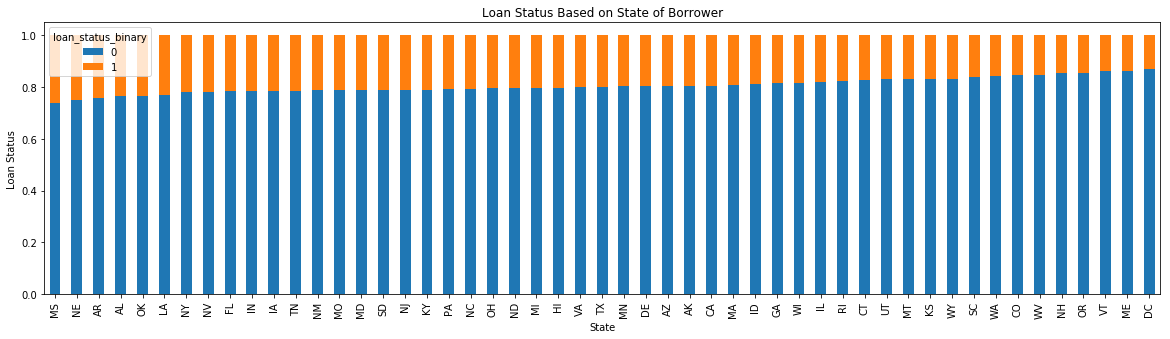

In [94]:
state = pd.crosstab(df.addr_state , df.loan_status_binary)
state = state.div(state.sum(1).astype(float), axis=0).sort_values(0)


state.plot(kind='bar', stacked=True, title='Loan Status Based on State of Borrower', figsize=(20,5))
plt.xlabel('State')
plt.ylabel('Loan Status')
# print(df.addr_state.value_counts())

In [95]:
#there are no obvious states that show higher default applicants 
#drop column on addr_state
df.drop(['addr_state'], axis=1, inplace=True)

On September 28th, 2012, LendingClub announced that, as opposed to its standard fractional investment business model, it would begin setting aside some loans that could only be purchased in their entirety–or as whole loans. LendingClub allows both institutional and retail investors to participate and claims to randomly select loans as whole or fractional without disenfranchsing either party. Several years later we can see that this still hold true and there is no significant difference between the defaults of a whole loan vs a fractional loan.  

https://www.lendacademy.com/lending-club-whole-loan-program-one-year-later/

Text(0, 0.5, 'Loan Status')

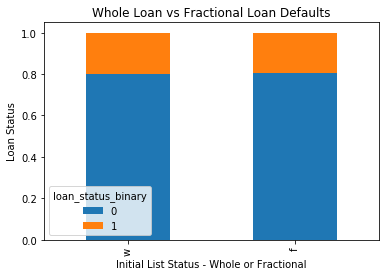

In [96]:
whole_fractional = pd.crosstab(df.initial_list_status , df.loan_status_binary)
whole_fractional = whole_fractional.div(whole_fractional.sum(1).astype(float),axis =0).sort_values(0)
whole_fractional.plot.bar(stacked = True, title = 'Whole Loan vs Fractional Loan Defaults')
plt.xlabel('Initial List Status - Whole or Fractional')
plt.ylabel('Loan Status')

In [97]:
# we can drop initial list status, lending club has claimed they randomly select applicants for whole or fractional and we
#see no obvious difference in the above chart. 
df.drop('initial_list_status', axis =1 , inplace = True)

Cash         1341199
DirectPay       6900
Name: disbursement_method, dtype: int64


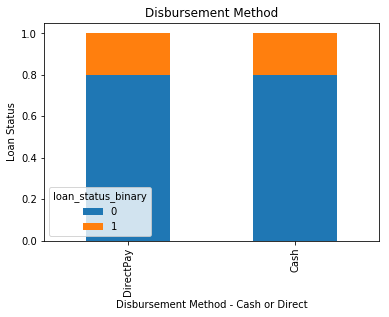

In [98]:
disbursement_method = pd.crosstab(df.disbursement_method , df.loan_status_binary)
disbursement_method = disbursement_method.div(disbursement_method.sum(1).astype(float),axis =0).sort_values(0)
disbursement_method.plot.bar(stacked = True, title = 'Disbursement Method')
plt.xlabel('Disbursement Method - Cash or Direct')
plt.ylabel('Loan Status')
print(df.disbursement_method.value_counts())

In [99]:
#no obvious difference between customers with different disbursement methods, and imbalanced class where most customers 
#disburse via cash, we will drop
df.drop(['disbursement_method'], axis=1, inplace=True)

In [100]:
df.drop([ 'month_delta', 'term_num', 'year', 'months_prepaid'], axis=1, inplace=True)

#### Impute Missing Values

In [101]:
obj_cols = df.columns[df.dtypes==object]

#Imputer function
imputer = lambda x:x.fillna(x.value_counts().index[0]) 

#Impute dtype=object with most frequent value
df[obj_cols] = df[obj_cols].apply(imputer) 

#Impute the rest of df with median
df = df.fillna(df.mode(axis=0).iloc[0]) 

In [102]:
len(df.columns)

60

#### Pickle cleaned dataframe

In [103]:
df.to_pickle('dfaccept_processed')
df = pd.read_pickle('dfaccept_processed')

In [104]:
df.loan_status_binary.value_counts()

0    1078739
1     269360
Name: loan_status_binary, dtype: int64

In [105]:
list(enumerate(df.columns))

[(0, 'loan_amnt'),
 (1, 'term'),
 (2, 'int_rate'),
 (3, 'sub_grade'),
 (4, 'emp_length'),
 (5, 'home_ownership'),
 (6, 'annual_inc'),
 (7, 'verification_status'),
 (8, 'purpose'),
 (9, 'dti'),
 (10, 'delinq_2yrs'),
 (11, 'earliest_cr_line'),
 (12, 'inq_last_6mths'),
 (13, 'open_acc'),
 (14, 'pub_rec'),
 (15, 'revol_bal'),
 (16, 'revol_util'),
 (17, 'total_acc'),
 (18, 'collections_12_mths_ex_med'),
 (19, 'application_type'),
 (20, 'acc_now_delinq'),
 (21, 'tot_coll_amt'),
 (22, 'tot_cur_bal'),
 (23, 'total_rev_hi_lim'),
 (24, 'acc_open_past_24mths'),
 (25, 'avg_cur_bal'),
 (26, 'bc_open_to_buy'),
 (27, 'bc_util'),
 (28, 'chargeoff_within_12_mths'),
 (29, 'delinq_amnt'),
 (30, 'mo_sin_old_il_acct'),
 (31, 'mo_sin_old_rev_tl_op'),
 (32, 'mo_sin_rcnt_rev_tl_op'),
 (33, 'mo_sin_rcnt_tl'),
 (34, 'mort_acc'),
 (35, 'mths_since_recent_bc'),
 (36, 'mths_since_recent_inq'),
 (37, 'num_accts_ever_120_pd'),
 (38, 'num_actv_bc_tl'),
 (39, 'num_bc_sats'),
 (40, 'num_bc_tl'),
 (41, 'num_il_tl'),
 (4

In [106]:
#reorder the columns so its easier to select y-variable later
columns = list(df.columns.values)
temp = columns[0]
columns[0] = columns[58]
columns[58] = temp
df = df[columns]

#### Dummify categorical variables

In [107]:
#Get categorical columns
cat_col = df.columns[df.dtypes==object] 

#Create dummy variables
df_dummy = pd.get_dummies(df[cat_col], drop_first = True) 

#Drop categorical columns already encoded
df.drop(cat_col, axis=1, inplace=True) 

#Join the dummy variables to original dataframe
df = df.join(df_dummy) 

#### Train Test Split

In [108]:
feat_labels = df.columns[1:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [109]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Classification Algorithms: Logistic Regression, Random Forest, Naive Bayes, and Gradient Boosted Regression.

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import GradientBoostingClassifier as GBC
from imblearn.pipeline import Pipeline
from xgboost.sklearn import XGBClassifier as XGB

In [111]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting 
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier as HGB

In [112]:
lr_pipeline = Pipeline([('scaler',StandardScaler()),
                        ('classifier', LR(random_state = 5))])

rf_pipeline = Pipeline([('scaler',StandardScaler()),
                        ('classifier', RF(random_state = 5))])

nb_pipeline = Pipeline([('scaler',StandardScaler()),
                        ('classifier', GNB())])

gb_pipeline = Pipeline([('scaler',StandardScaler()),
                        ('classifier', GBC(random_state = 5))])

hgb_pipeline = Pipeline([('scaler',StandardScaler()),
                        ('classifier', HGB(random_state = 5))])

xgb_pipeline = Pipeline([('scaler',StandardScaler()),
                        ('classifier', XGB(random_state = 5))])


### GridSearch

In [113]:
from sklearn.model_selection import GridSearchCV 


#Grid search for logistic regression
lr_param_range = [1000] 
lr_class_weight = [{0:0.08, 1:0.92}]
lr_param_grid = [{'classifier__C':lr_param_range,
                'classifier__class_weight':lr_class_weight}]
gridsearch_lr = GridSearchCV(estimator = lr_pipeline,
                          param_grid = lr_param_grid,
                          n_jobs = -1,
                          cv = 3)

#Grid search for random forest
rf_class_weight = [{0:0.08, 1:0.92}]
rf_param_grid =[{'classifier__max_features': ["sqrt"],
                 'classifier__class_weight':rf_class_weight,
                 'classifier__min_samples_split': [100],
                 'classifier__min_samples_leaf': [5],
                 'classifier__n_estimators': [100],
                 'classifier__criterion': ["entropy"]}] 
gridsearch_rf = GridSearchCV(estimator = rf_pipeline,
                          param_grid = rf_param_grid,
                          n_jobs = -1,
                          cv = 3)

#Grid search for Gradient Boosting Classifier
gb_param_grid = [{'classifier__n_estimators': [500,1000],
                  'classifier__min_samples_leaf': [5,15],
                  'classifier__max_features': ['sqrt'],
                  'classifier__learning_rate': [0.1],
                  }]
gridsearch_gb = GridSearchCV(estimator = gb_pipeline,
                          param_grid = gb_param_grid,
                          n_jobs = -1,
                          cv = 3)

#Grid search for Hist Gradient Boosting Classifier
hgb_param_grid = [{'classifier__max_iter':[500],
                   'classifier__learning_rate':[0.1],
                   'classifier__max_depth':[25,50],
                   'classifier__l2_regularization':[1]}]

gridsearch_hgb = GridSearchCV(estimator = hgb_pipeline,
                          param_grid = hgb_param_grid,
                          n_jobs = -1,
                          cv = 3)

#Grid search for XG Boost
hgb_param_grid = [{'classifier__max_iter':[500],
                   'classifier__learning_rate':[0.1],
                   'classifier__max_depth':[25,50],
                   'classifier__l2_regularization':[1]}]

gridsearch_hgb = GridSearchCV(estimator = hgb_pipeline,
                          param_grid = hgb_param_grid,
                          n_jobs = -1,
                          cv = 3)



We will only test a portion of the dataset for time efficiency.

In [310]:
df_shuffle = df.reindex(np.random.permutation(df.index))[0:350000]

In [312]:
X_gs_train = df_shuffle.iloc[:,1:]
y_gs_train = df_shuffle.iloc[:,0]

Import dill to pickle best estimators for time efficiency

In [313]:
df_shuffle.loan_status_binary.value_counts()

0    280002
1     69998
Name: loan_status_binary, dtype: int64

In [314]:
import dill

In [315]:
gridsearch_lr.fit(X_gs_train, y_gs_train)
gridsearch_best_estimator_lr = gridsearch_lr.best_estimator_
dill.dump(gridsearch_best_estimator_lr, open('LogisticRegression_gridsearch.pkl', 'wb'))

gridsearch_rf.fit(X_gs_train, y_gs_train)
gridsearch_best_estimator_rf = gridsearch_rf.best_estimator_
dill.dump(gridsearch_best_estimator_rf, open('RandomForest_gridsearch.pkl', 'wb'))

gridsearch_gb.fit(X_gs_train, y_gs_train)
gridsearch_best_estimator_gb = gridsearch_gb.best_estimator_
dill.dump(gridsearch_best_estimator_gb, open('GradientBoosting_gridsearch.pkl', 'wb'))

gridsearch_hgb.fit(X_gs_train, y_gs_train)
gridsearch_best_estimator_hgb = gridsearch_hgb.best_estimator_
dill.dump(gridsearch_best_estimator_hgb, open('HistGradientBoosting_gridsearch.pkl','wb'))

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We write a function to draw a Confusion Matrix 

In [114]:
def draw_ConfusionMatrix(conf_matrix, classifier_name):
    ''' The confusion matrix draw function'''
    fig, ax = plt.subplots(figsize=(4.5, 4.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Greens, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

    plt.title('Confusion Matrix for %s' % classifier_name)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()

In [115]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from scipy import interp

We write a function to display ROC/AUC graph, cross validation results and confusion matrix.

In [116]:
def run_cv(X, y, classifier, clf_name):
    
    #Construct a kfolds object
    kf = KFold(n_splits=5,shuffle=True)
    
    accuracy_scores = []
            
    #Initialize ROC variables
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    
    clf = classifier
    
    y_pred_full = y.copy()
    
    #Iterate through folds
    for i,(train_index, test_index) in enumerate(kf.split(y)):
        
        #Obtain the training and validation data sets for each fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]
                
        #Train the classifier on the training data
        clf_fit = clf.fit(X_train,y_train)
        
        #Obtain a prediction on the test set
        y_pred = clf_fit.predict(X_test)
        
        #Map the prediction for this fold to the full dataset
        y_pred_full.iloc[test_index] = y_pred
    
        #Calculate the accuracy of the prediction on current fold
        accuracy_scores.append(accuracy_score(y_true=y_test, y_pred=y_pred))
        
        #Get probabilities and compute area under ROC curve
        probas_ = clf_fit.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    
    #Get Evaluation metrics    
    #Draw ROC Curve    
    mean_tpr /= len(y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    plt.plot([0, 1], 
             [0, 1], 
             '--', 
             color=(0.6, 0.6, 0.6), 
             label='Luck')
    
    plt.plot([0, 0, 1], 
             [0, 1, 1], 
             lw=2,
             linestyle=':',
             color='black',
             label='Perfect Performance')
    
    plt.plot(mean_fpr, 
             mean_tpr, 
             'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for %s' % classifier_name)
    plt.legend(loc="lower right")
    #plt.tight_layout()
    plt.show()
    
    #Accuracy score
    mean = np.mean(accuracy_scores)
    std = np.std(accuracy_scores)
    print(clf_name + ':' + '\n' + 'cross-validation accuracy')
    print("%.2f +/- %.3f" % (mean, std))
    print(classification_report(y, y_pred_full))
    
    #Confusion Matrix
    conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_full)
    draw_ConfusionMatrix(conf_matrix, clf_name)
    
    return clf_fit

In [118]:
import dill
with open('LogisticRegression_gridsearch.pkl', 'rb') as f:
    LogisticRegression_classifier = dill.load(f)
    
with open('RandomForest_gridsearch.pkl', 'rb') as f:
    RandomForest_classifier = dill.load(f)
    
with open('GradientBoosting_gridsearch.pkl', 'rb') as f:
    GradientBoosting_classifier = dill.load(f)
    
with open('HistGradientBoosting_gridsearch.pkl', 'rb') as f:
    HistGradientBoosting_classifier = dill.load(f)

### Model Results

As risk averse debt investors, one of our priorities is to allocate large sums of money into lending club loans while avoiding defaults. We would like to try our best to minimize the Type II Error, where we predict a non-default which ends up defaulting. Therefore, accuracy is not a measure we would like to maximize. Instead we will look at the precision and recall of the confusion matrix. We rather have higher precision even if it means sacrificing accuracy. 

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

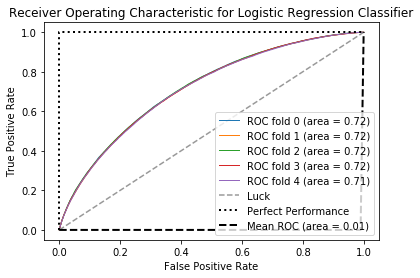

Logistic Regression Classifier:
cross-validation accuracy
0.35 +/- 0.001
              precision    recall  f1-score   support

           0       0.95      0.20      0.33    808781
           1       0.23      0.96      0.37    202293

    accuracy                           0.35   1011074
   macro avg       0.59      0.58      0.35   1011074
weighted avg       0.80      0.35      0.34   1011074



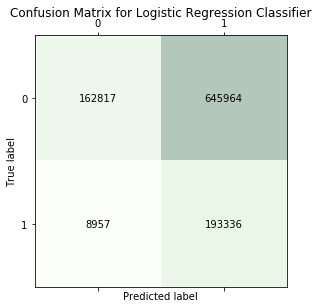

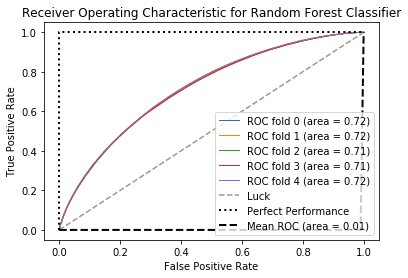

Random Forest Classifier:
cross-validation accuracy
0.51 +/- 0.001
              precision    recall  f1-score   support

           0       0.92      0.42      0.58    808781
           1       0.27      0.85      0.41    202293

    accuracy                           0.51   1011074
   macro avg       0.59      0.64      0.49   1011074
weighted avg       0.79      0.51      0.54   1011074



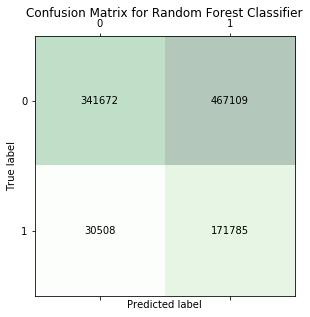

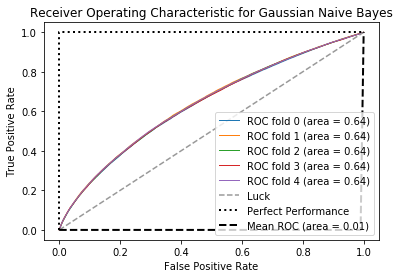

Gaussian Naive Bayes:
cross-validation accuracy
0.42 +/- 0.013
              precision    recall  f1-score   support

           0       0.88      0.32      0.47    808781
           1       0.23      0.82      0.36    202293

    accuracy                           0.42   1011074
   macro avg       0.55      0.57      0.41   1011074
weighted avg       0.75      0.42      0.44   1011074



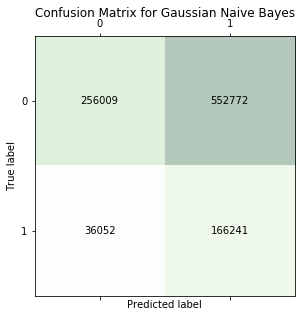

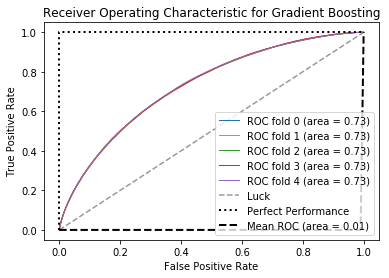

Gradient Boosting:
cross-validation accuracy
0.81 +/- 0.001
              precision    recall  f1-score   support

           0       0.81      0.98      0.89    808781
           1       0.58      0.10      0.17    202293

    accuracy                           0.81   1011074
   macro avg       0.70      0.54      0.53   1011074
weighted avg       0.77      0.81      0.75   1011074



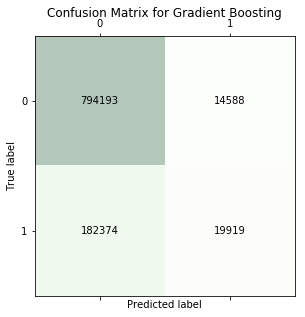

In [320]:
classifier_name = 'Logistic Regression Classifier'
model_pipeline_lr = run_cv(X_train, y_train, LogisticRegression_classifier, classifier_name)

classifier_name = 'Random Forest Classifier'
model_pipeline_rf = run_cv(X_train, y_train, RandomForest_classifier, classifier_name)
dill.dump(model_pipeline_rf, open('RandomForest_model_AllFeatures.pkl', 'wb'))

classifier_name = 'Gaussian Naive Bayes'
GaussianNB_classifier = GNB()
model_pipeline_nb = run_cv(X_train, y_train, GaussianNB_classifier, classifier_name)

classifier_name = 'Gradient Boosting'
model_pipeline_gb = run_cv(X_train, y_train, GradientBoosting_classifier, classifier_name)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

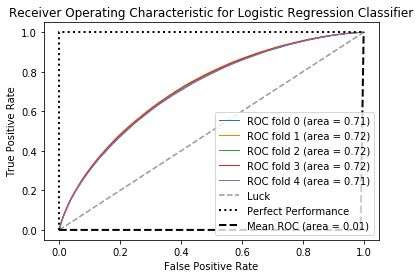

Logistic Regression Classifier:
cross-validation accuracy
0.64 +/- 0.001
              precision    recall  f1-score   support

           0       0.89      0.63      0.74    808781
           1       0.32      0.68      0.43    202293

    accuracy                           0.64   1011074
   macro avg       0.60      0.66      0.59   1011074
weighted avg       0.77      0.64      0.68   1011074



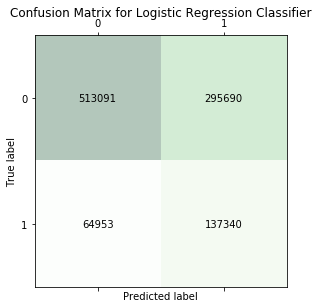

In [165]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.2, 1: 0.8},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

classifier_name = 'Logistic Regression Classifier'
model_pipeline_lr = run_cv(X_train, y_train, LogisticRegression_classifier, classifier_name)


0.6437243960382721
              precision    recall  f1-score   support

           0       0.89      0.63      0.74    808781
           1       0.32      0.68      0.43    202293

    accuracy                           0.64   1011074
   macro avg       0.60      0.66      0.59   1011074
weighted avg       0.77      0.64      0.68   1011074



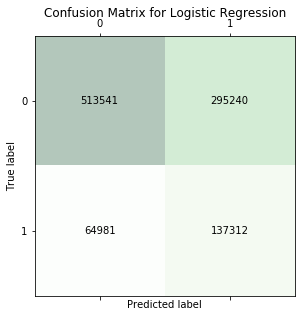

In [166]:
y_pred = model_pipeline_lr.predict(X_train)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_train, y_pred=y_pred))
print(classification_report(y_train, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, 'Logistic Regression')

In [168]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_train_df = pd.DataFrame(y_train).rename(columns = {'loan_status_binary': 'y_train'})

In [169]:
a = pd.merge(X_train, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_train_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [170]:
o = b.loc[(b.y_train == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_train == 1)&(b.y_pred == 0),'profit'].sum()

In [171]:
o-p

1224065328.7933283

In [174]:
e = b.loc[(b.y_train == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_train == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [175]:
e+n

7623741225.0

In [176]:
(o-p)/(e+n)

0.1605596639061327

# Test

### Class Weights = Class 0:0 , Class 1: 1

In [380]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0, 1: 1},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.19899710703953713


C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    269958
           1       0.20      1.00      0.33     67067

    accuracy                           0.20    337025
   macro avg       0.10      0.50      0.17    337025
weighted avg       0.04      0.20      0.07    337025



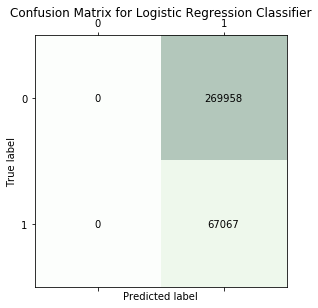

In [381]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [382]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [383]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [384]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [385]:
o-p

0.0

In [386]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [387]:
e+n

0.0

In [388]:
(o+p)/(e+n)

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

### Class Weights = Class 0: 0.01 , Class 1: 0.99

In [389]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.01, 1: 0.99},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.19920777390401306
              precision    recall  f1-score   support

           0       0.97      0.00      0.00    269958
           1       0.20      1.00      0.33     67067

    accuracy                           0.20    337025
   macro avg       0.59      0.50      0.17    337025
weighted avg       0.82      0.20      0.07    337025



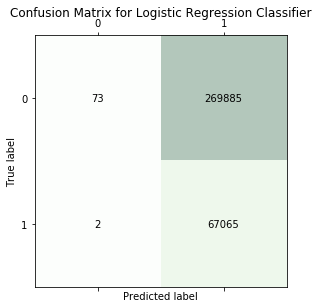

In [390]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [391]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [392]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [393]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [394]:
o-p

139597.1083223562

In [395]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [396]:
e+n

1590250.0

In [397]:
(o+p)/(e+n)

0.03963691766851513

### Class Weights = Class 0: 0.05, Class 1: 0.95

In [398]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.05, 1: 0.95},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.26991172761664567
              precision    recall  f1-score   support

           0       0.96      0.09      0.17    269958
           1       0.21      0.99      0.35     67067

    accuracy                           0.27    337025
   macro avg       0.59      0.54      0.26    337025
weighted avg       0.81      0.27      0.20    337025



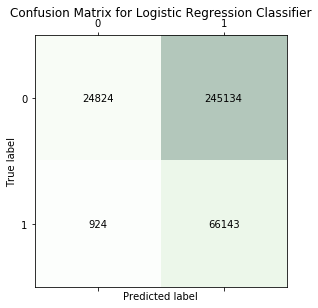

In [399]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [400]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [401]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [402]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [403]:
o-p

32453164.508813992

In [404]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [405]:
e+n

355408025.0

In [406]:
(o+p)/(e+n)

0.057060315494251064

### Class Weights = Class 0: 0.1, Class 1: 0.9

In [407]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.1, 1: 0.9},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4085601958311698
              precision    recall  f1-score   support

           0       0.94      0.28      0.43    269958
           1       0.24      0.92      0.38     67067

    accuracy                           0.41    337025
   macro avg       0.59      0.60      0.41    337025
weighted avg       0.80      0.41      0.42    337025



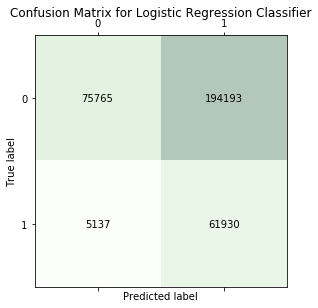

In [408]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [409]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [410]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [411]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [412]:
o-p

128560444.34151506

In [413]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [414]:
e+n

1087965050.0

In [415]:
(o+p)/(e+n)

0.062438942784312626

### Class Weights = Class 0: 0.15, Class 1: 0.85

In [416]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.15, 1: 0.85},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5401824790445813
              precision    recall  f1-score   support

           0       0.91      0.47      0.62    269958
           1       0.28      0.81      0.41     67067

    accuracy                           0.54    337025
   macro avg       0.59      0.64      0.52    337025
weighted avg       0.78      0.54      0.58    337025



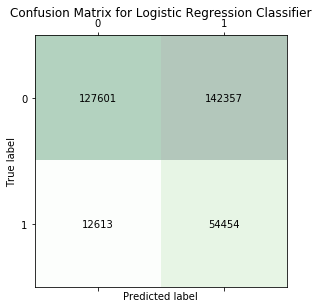

In [417]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [418]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [419]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [420]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [421]:
o-p

262629485.35579693

In [422]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [423]:
e+n

1852106250.0

In [424]:
(o+p)/(e+n)

0.06199533125863957

### Class Weights = Class 0: 0.2, Class 1: 0.8

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6423826125658334
              precision    recall  f1-score   support

           0       0.89      0.63      0.74    269958
           1       0.31      0.67      0.43     67067

    accuracy                           0.64    337025
   macro avg       0.60      0.65      0.58    337025
weighted avg       0.77      0.64      0.68    337025



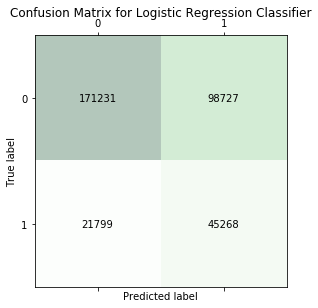

In [425]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.2, 1: 0.8},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [426]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [427]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [428]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [429]:
o-p

409709152.60298765

In [430]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [431]:
e+n

2541912725.0

In [432]:
(o+p)/(e+n)

0.05860606898526933

### Class Weights = Class 0: 0.25, Class 1: 0.75

In [433]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.25, 1: 0.75},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7150063051702396
              precision    recall  f1-score   support

           0       0.87      0.76      0.81    269958
           1       0.35      0.53      0.42     67067

    accuracy                           0.72    337025
   macro avg       0.61      0.64      0.62    337025
weighted avg       0.76      0.72      0.73    337025



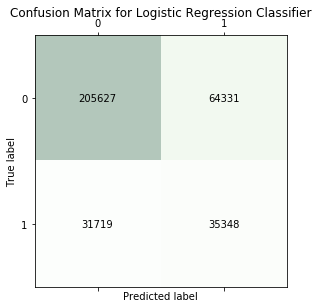

In [434]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [435]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [436]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [437]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [438]:
o-p

560870686.5639849

In [439]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [440]:
e+n

3156312700.0

In [441]:
(o+p)/(e+n)

0.05411150498728679

### Class Weights = Class 0: 0.3, Class 1: 0.70

In [442]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.3, 1: 0.70},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7598041688302055
              precision    recall  f1-score   support

           0       0.85      0.85      0.85    269958
           1       0.40      0.39      0.39     67067

    accuracy                           0.76    337025
   macro avg       0.62      0.62      0.62    337025
weighted avg       0.76      0.76      0.76    337025



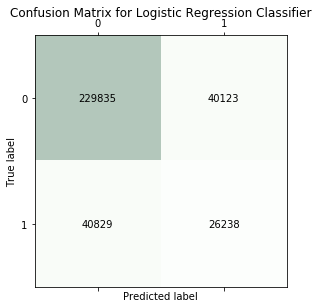

In [443]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [444]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [445]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [446]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [447]:
o-p

699888588.4851944

In [448]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [449]:
e+n

3653249575.0

In [450]:
(o+p)/(e+n)

0.04979952315126303

### Class Weights = Class 0: 0.35, Class 1: 0.65

In [451]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.35, 1: 0.65},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7851019954009346
              precision    recall  f1-score   support

           0       0.84      0.91      0.87    269958
           1       0.44      0.28      0.34     67067

    accuracy                           0.79    337025
   macro avg       0.64      0.60      0.61    337025
weighted avg       0.76      0.79      0.77    337025



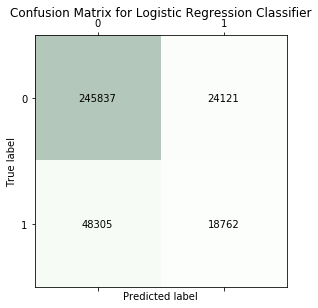

In [452]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [453]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [454]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [455]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [456]:
o-p

818041717.0519158

In [457]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [458]:
e+n

4037977250.0

In [459]:
(o+p)/(e+n)

0.04549669808928897

### Class Weights = Class 0: 0.40, Class 1: 0.60

In [460]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.40, 1: 0.60},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7967480157258363
              precision    recall  f1-score   support

           0       0.82      0.95      0.88    269958
           1       0.47      0.19      0.27     67067

    accuracy                           0.80    337025
   macro avg       0.65      0.57      0.58    337025
weighted avg       0.75      0.80      0.76    337025



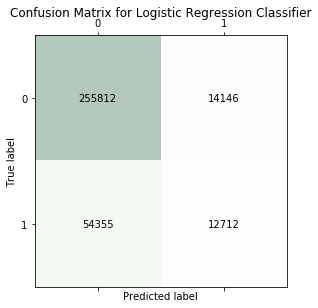

In [461]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [462]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [463]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [464]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [465]:
o-p

914742829.9028778

In [466]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [467]:
e+n

4326615225.0

In [468]:
(o+p)/(e+n)

0.04109336345767761

### Class Weights = Class 0: 0.45, Class 1: 0.55

In [469]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.45, 1: 0.55},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8022609598694459
              precision    recall  f1-score   support

           0       0.82      0.97      0.89    269958
           1       0.51      0.12      0.19     67067

    accuracy                           0.80    337025
   macro avg       0.66      0.55      0.54    337025
weighted avg       0.76      0.80      0.75    337025



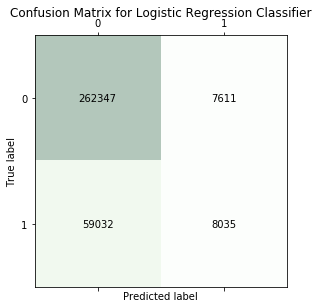

In [470]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [471]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [472]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [473]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [474]:
o-p

991343644.9326657

In [475]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [476]:
e+n

4540544575.0

In [477]:
(o+p)/(e+n)

0.03750768290825395

### Class Weights = Class 0: 0.5, Class 1: 0.5

In [478]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.5, 1: 0.5},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8034982568058749
              precision    recall  f1-score   support

           0       0.81      0.99      0.89    269958
           1       0.55      0.07      0.12     67067

    accuracy                           0.80    337025
   macro avg       0.68      0.53      0.50    337025
weighted avg       0.76      0.80      0.74    337025



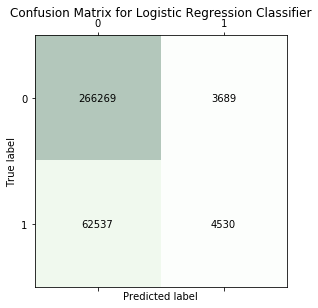

In [479]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [480]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [481]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [482]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [483]:
o-p

1047399172.6692905

In [484]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [485]:
e+n

4687936600.0

In [486]:
(o+p)/(e+n)

0.034189377348809655

### Class Weights = Class 0: 0.75, Class 1: 0.25

In [487]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 0.75, 1: 0.25},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8010236629330169
              precision    recall  f1-score   support

           0       0.80      1.00      0.89    269958
           1       0.58      0.00      0.00     67067

    accuracy                           0.80    337025
   macro avg       0.69      0.50      0.45    337025
weighted avg       0.76      0.80      0.71    337025



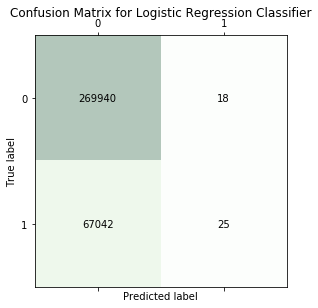

In [488]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [489]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [490]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [491]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [492]:
o+p

139017858.99862677

In [493]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [494]:
e+n

4858918775.0

In [495]:
(o+p)/(e+n)

0.02861086291746599

### Class Weights = Class 0: 1, Class 1: 0

In [496]:
LogisticRegression_classifier = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LR(C=1000, class_weight={0: 1, 1: 0},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2', random_state=5,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8010028929604629


C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.80      1.00      0.89    269958
           1       0.00      0.00      0.00     67067

    accuracy                           0.80    337025
   macro avg       0.40      0.50      0.44    337025
weighted avg       0.64      0.80      0.71    337025



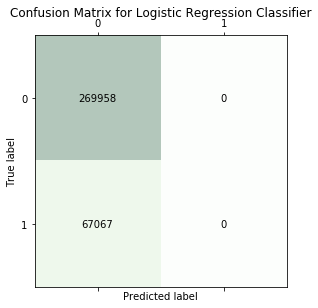

In [497]:
clf_name = 'Logistic Regression Classifier'
clf = LogisticRegression_classifier

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)


In [498]:
y_pred_df = pd.DataFrame(y_pred).rename(columns = {0:'y_pred'})
y_test_df = pd.DataFrame(y_test).rename(columns = {'loan_status_binary': 'y_test'})

In [499]:
a = pd.merge(X_test, total_payments_df, left_index = True, right_index = True)
b= pd.merge(a,pd.concat([y_test_df.reset_index(),y_pred_df],1), how = 'left', left_index = True, right_on = 'index')

In [500]:
o = b.loc[(b.y_test == 0)&(b.y_pred == 0),'profit'].sum()
p = b.loc[(b.y_test == 1)&(b.y_pred == 0),'profit'].sum()

In [501]:
o+p

138794973.97215605

In [502]:
e = b.loc[(b.y_test == 0)&(b.y_pred == 0),'loan_amnt'].sum()
n = b.loc[(b.y_test == 1)&(b.y_pred == 0),'loan_amnt'].sum()

In [503]:
e+n

4859872450.0

In [504]:
(o+p)/(e+n)

0.028559386156761388

In [365]:
a['profit'].sum()

138794973.97215596

In [361]:
a['profit'].sum()/a['loan_amnt'].sum()


0.02855938615676137

In [364]:
a['loan_amnt'].sum()

4859872450.0